In [36]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

try:
    import text_recognizer
except ImportError:
    import sys
    sys.path.append('..')

from text_recognizer.datasets import IamDataset
from text_recognizer.datasets import IamParagraphsDataset
from text_recognizer.models import LineDetectorModel
from text_recognizer import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
paragraphs_dataset = IamParagraphsDataset()
paragraphs_dataset.load_or_generate_data()
print(paragraphs_dataset)

Max crop width and height were found to be 1240x1156.
Setting them to 1240x1240
Cropping paragraphs, generating ground truth, and saving debugging images to /Users/sergeyk/work/fsdl/fsdl-text-recognizer/data/interim/iam_paragraphs/debug_crops
Rescued /Users/sergeyk/work/fsdl/fsdl-text-recognizer/data/raw/iam/iamdb/forms/e01-086.jpg: could not broadcast input array from shape (687,1236) into shape (687,1240)
Rescued /Users/sergeyk/work/fsdl/fsdl-text-recognizer/data/raw/iam/iamdb/forms/e01-081.jpg: could not broadcast input array from shape (587,1236) into shape (587,1240)
Loading IAM paragraph crops and ground truth from image files...
IAM Paragraphs Dataset
Num classes: 3
Train: (1229, 256, 256) (1229, 256, 256, 3)
Test: (308, 256, 256) (308, 256, 256, 3)



In [5]:
line_detector_model = LineDetectorModel()
line_detector_model.load_weights()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256)     0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 256, 256, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 800         reshape[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 12560       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (

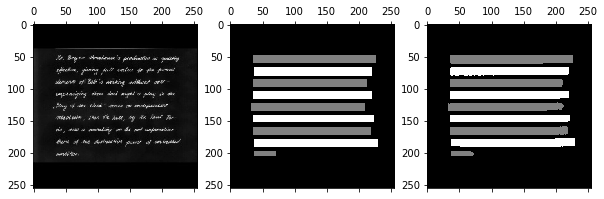

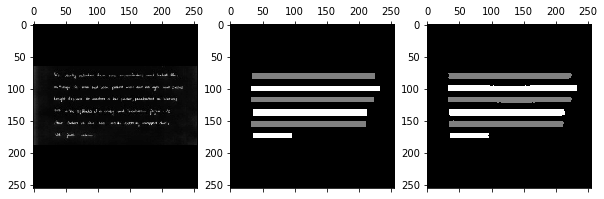

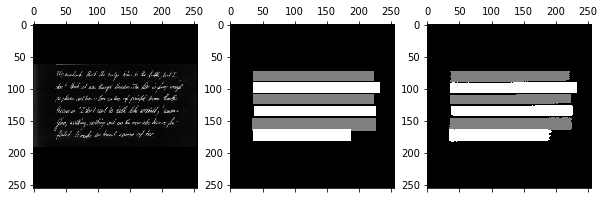

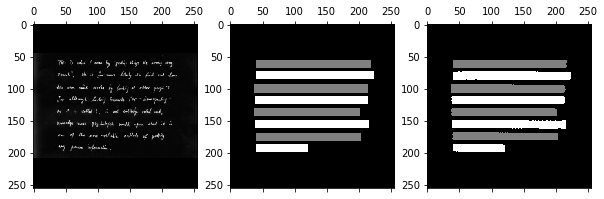

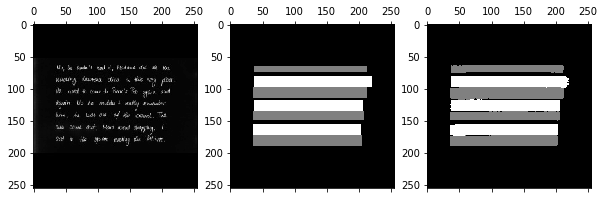

In [32]:
# Let's look at some test predictions

for ind in range(5):
    image = paragraphs_dataset.x_test[ind]
    gt = paragraphs_dataset.y_test[ind].argmax(-1)
    pred = line_detector_model.predict_on_image(image).argmax(-1)
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(131)
    ax1.matshow(image, cmap='gray')
    ax2 = fig.add_subplot(132)
    ax2.matshow(gt, cmap='gray')
    ax3 = fig.add_subplot(133)
    ax3.matshow(pred, cmap='gray')

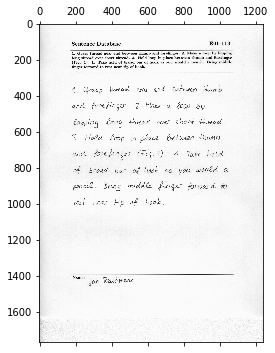

In [41]:
# We can apply this model to any sized image

iam_dataset = IamDataset()
image = util.read_image(iam_dataset.form_filenames[0], grayscale=True)
plt.matshow(image, cmap='gray')

# pred = line_detector_model.predict_on_image(image)